# Basic model with obstacles

In [18]:
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [13]:
#define parameters

v_max = 12 # but tends to be different for flocks and lone birds (maybe incorporate some random noise)
lambda_c = 1
lambda_a = 1
lambda_m = 1
R = 1 # sight range of bird
Rsquare = 1**2
r_n = 0.1 # min distance between birds
r_o = 0.5 # min distance between bird and obstacle

dt = 0.2      # time step
Nt = 80       # number of time steps
N = 1000     # number of birds

L = 10       # size of box

 need some initialisation of objects, birds and grid.

In [30]:
def init_environment(height, width, obstacle_density):
    rand_grid = np.random.rand(height, width)
    grid = np.zeros((height, width))
    obstacles = rand_grid < obstacle_density
    grid[obstacles] = 1
    return grid, obstacles
        


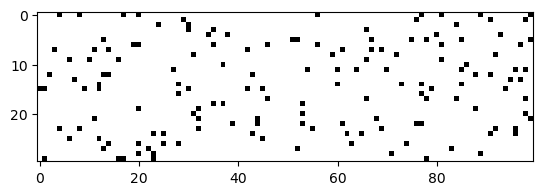

In [33]:


grid, obstacles = init_environment(30,100,0.05)

fig, ax =plt.subplots()
ax.imshow(grid, cmap='gray_r')
plt.show()

In [37]:
def initialize_birds(N,L):
    '''
    Set initial positions, direction, and velocities 
    '''
    # bird positions
    x = np.random.rand(N,1)*L
    y = np.random.rand(N,1)*L

    # bird velocities
    theta = 2 * np.pi * np.random.rand(N,1)
    vx = v_max * np.cos(theta)
    vy = v_max * np.sin(theta)

    return x, y, vx, vy, theta

In [4]:
def centre_of_mass(x, y, lambda_c, R):
    # define neighbours birds can see
    
    vx_c=np.zeros(N)
    vy_c=np.zeros(N)
    for bird in range(N):
        neighbors = (x-x[bird])**2+(y-y[bird])**2 < R**2 # find neighbours x_j within R
        Ni=neighbors.shape[0] # maybe 1, see what happens
        
        vx_c=np.zeros(N)
        vy_c=np.zeros(N)
        sumx= np.sum(x[neighbours])
        sumy= np.sum(y[neighbours])
    
        vx_c[bird] = lambda_c*(sumx/Ni-x[bird])
        vy_c[bird] = lambda_c*(sumy/Ni-y[bird])
    
    return vx_c, vy_c
        

In [9]:
def avoid_collisions_birds(x, y, lambda_a, r_n):
    # define birds within minimum distance
    
    vx_a=np.zeros(N)
    vy_a=np.zeros(N)
    for bird in range(N):
        neighbors = (x-x[bird])**2+(y-y[bird])**2 < r_n**2 # find neighbours x_j within r_n
        
        vx_a[bird] = lambda_a*np.sum(x[bird]-x[neighbors])
        vy_a[bird] = lambda_a*np.sum(y[bird]-y[neighbors])
        
    return vx_a, vy_a
    
    

In [ ]:
def avoid_collisions_obstacle(x, y, x_o, y_o, lambda_a, r_o):
    
    vx_a=np.zeros(N)
    vy_a=np.zeros(N)
    
    for birds in range(N):
        collision = (x_o-x[bird])**2+(y_o-y[bird])**2 < r_o**2 # find neighbours x_j within r_o
        
        vx_a[bird] = lambda_a*np.sum(x[bird]-x[collision])
        vy_a[bird] = lambda_a*np.sum(y[bird]-y[collision])
        
    return vx_a, vy_a

In [10]:
def match_velocities(x, y, vx, vy, lambda_m, R):
    
    vx_m=np.zeros(N)
    vy_m=np.zeros(N)
    
    for bird in range(N):
        neighbors = (x-x[bird])**2+(y-y[bird])**2 < R**2 # find neighbours x_j within R
        Ni=neighbors.shape[0]
        
        sumx= np.sum(vx[neighbours])
        sumy= np.sum(vy[neighbours])
        
        vx_m[bird] = lambda_m*(sumx/Ni-vx[bird])
        vy_m[bird] = lambda_m*(sumy/Ni-vy[bird])

In [11]:
def update_velocities(vx, vy, vx_c, vy_c, vx_na, vy_na, vx_oba, vy_oba, vx_m, vy_m):
    vx_next = vx + vx_c + vx_na + vx_oba + vx_m 
    vy_next = vy + vy_c + vy_na + vy_oba + vy_m
    
    return vx_next, vy_next

In [12]:
def limit_speed(vx, vy, v_max):
    
    vx_next = min(1, v_max/np.sqrt(vx**2+vy**2))*vx
    vy_next = min(1, v_max/np.sqrt(vx**2+vy**2))*vy
    
    return vx_next, vy_next

In [ ]:
import matplotlib.pyplot as plt

# set up a figure
fig, ax = plt.subplots(figsize = (10,10))

# get the initial configuration
x, y, vx, vy, theta = initialize_birds(N,L)

# do an initial plot and set up the axes
q = plt.quiver(x,y,vx,vy)
ax.set(xlim=(0, L), ylim=(0, L))
ax.set_aspect('equal')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# do each step, updating the quiver and plotting the new one
for iT in range(Nt):
    x,y,vx,vy = step(x,y,vx,vy,theta,Rsq,eta,N,dt)
    q = update_quiver(q,x,y,vx,vy)
    clear_output(wait=True)
    display(fig)